<a href="https://colab.research.google.com/github/YutaOkkotsu0/cv/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset into a pandas dataframe

In [ ]:
df = pd.read_csv("normalizeddata_file.csv")
df

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,0,Muhammad Usman,Male,440,369,2.80,Black,March,77
1,1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...,...
123,123,M Abubakar Malik,Male,410,349,2.94,Blue,February,65
124,124,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
125,125,shafaqat ali,Male,424,400,3.07,Black,May,58
126,126,Ammar Asif,Male,351,423,2.52,Black,December,68


# names start with letter H

In [ ]:
names_starting_with_H = df["Name"].str.startswith("H")
df[names_starting_with_H]

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
19,19,Habib Ullah,Male,399,434,3.35,Mustard,April,60
20,20,Hunain Javed,Male,362,413,2.94,Black,September,76
56,56,Hafiz Malahim Labib.,Male,390,430,3.24,Orange,May,54
57,57,HAMNA TARIQ SALEEMI,Female,400,418,2.80,Black,October,62
74,74,Hina,Female,410,350,2.90,Blue,August,67
75,75,Hamza Javed Khan,Male,400,381,3.39,Blue,January,78
77,77,Husnain Ahmed,Male,335,427,2.41,Dark blue,September,72
94,94,Hussain afzal,Male,415,346,2.87,Blue,March,81


# students with three words name



In [ ]:
result = []
for n in df['name']:
    n = re.findall(r'(\w+)(\s)(\w+)(\s)(\w+)', n)
    if n != []:
        jsonObj = {"name":n[0][0] + n[0][1] + n[0][2] + n[0][3] + n[0][4]}
        result.append(jsonObj)
    
df = pd.DataFrame(result)
df

,name
0,Syeda Maham Gillani
1,Muhammad Subhan Khan
2,SARMAD WAHEED AHMED
3,M Hassaan Lateef
4,Ahmed Amjad Dar
5,Muhammad Ibrahim Khalil
6,Muhammad saim jamil
7,Ahmar Hafeez Khan
8,Muhammad Umar Asghar
9,MUHAMMAD HAIDER AWAN


# list of students with cgpa 3.0 or above


In [ ]:
count = 0
for cgpa in df['CGPA']:
    if float(cgpa) >= 3.0:
        count+=1
        
percentage = count / len(df['CGPA']) *100

print("Percentage :" + str(float("{:.2f}".format(percentage))) + "%")

Percentage :26.56%


# PIE CHART


Male = 108
Female = 20


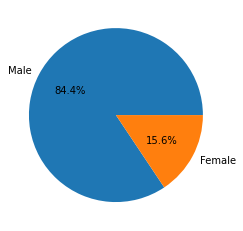

In [ ]:
male = 0
female = 0

for gender in df['Gender']:
    if gender == "Male":
        male+=1
    else:
        female+=1
        
print("Male = " + str(male))
print("Female = " + str(female))

labels = ['Male', 'Female']
data = [male, female]
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.show()

# Histogram

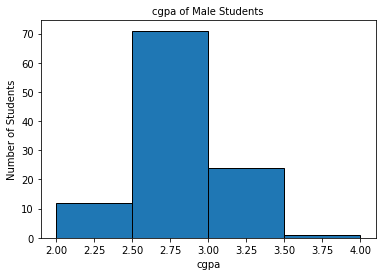

In [ ]:
result = []

for gpa, gender in zip(df['CGPA'], df['Gender']):
    
    if gender == 'Male':
        result.append(gpa)
    
plt.hist(result, edgecolor='black', bins=[2, 2.5, 3.0, 3.5, 4])
# plt.grid()
plt.title('cgpa of Male Students', fontsize=10)
plt.xlabel('cgpa', fontsize=10)
plt.ylabel('Number of Students', fontsize=10)
plt.show()

# Scatter Plot

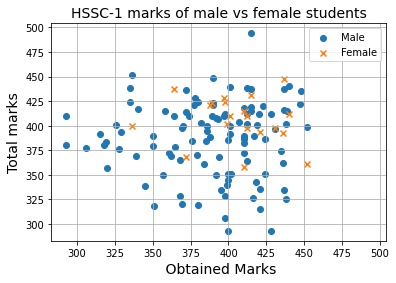

In [ ]:
marks_of_male = []
marks_of_female = []

for gender, marks in zip(df['Gender'], df['HSSC-1']):
    if gender == 'Male':
        marks_of_male.append(marks)
    else:
        marks_of_female.append(marks)
            
p = 0
q = len(df['HSSC-1']) - len(marks_of_male)
while (p < q):
    marks_of_male.append('NaN')
    p+=1

p = 0
q = len(df['HSSC-1']) - len(marks_of_female)
while (p < q):
    marks_of_female.append('NaN')
    p+=1
    

range = df['HSSC-1']

plt.scatter(range, marks_of_male, marker='o')
plt.scatter(range,marks_of_female, marker='x')
plt.xlabel(' Obtained Marks', fontsize=14)
plt.ylabel('Total marks', fontsize=14)
plt.title("HSSC-1 marks of male vs female students", fontsize=14)
plt.legend(["Male" , "Female"])
plt.grid(True)
plt.show()


# Bar Chart

In [ ]:
p = df['FAVORITECOLOR'].unique()
jsonObj = {"Color":p}
df = pd.DataFrame(p) 
df = pd.DataFrame(jsonObj)
df

male = []
female = []
for color in df['Color']:
    mfrequency = 0
    ffrequency = 0
    for culr, gndr in zip(df['FavoriteColor'], df['Gender']):
        if color == culr:
            if(gndr == "Male"):
                mfrequency+=1
            else:
                ffrequency+=1
    male.append(mfrequency)
    female.append(ffrequency)
    
X_axis = np.arange(len(p))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female')
  
plt.xticks(X_axis, p, rotation='vertical')
plt.xlabel("Colors")
plt.ylabel("No. of Students")
plt.title("Favorite Colors")
plt.legend()
plt.show()

KeyError: ignored

# Line Chart

In [ ]:


results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for month in df['BirthMonth']:
    if month == 'january':
        results[0] += 1
    elif month == 'february':
        results[1] += 1
    elif month == 'march':
        results[2] += 1
    elif month == 'april':
        results[3] += 1
    elif month == 'may':
        results[4] += 1
    elif month == 'june':
        results[5] += 1
    elif month == 'july':
        results[6] += 1
    elif month == 'august':
        results[7] += 1
    elif month == 'september':
        results[8] += 1
    elif month == 'october':
        results[9] += 1
    elif month == 'november':
        results[10] += 1
    elif month == 'december':
        results[11] += 1
    
print(results)
p = np.arange(start=1, stop=13, step = 1)
my_xticks = ['jan','feb','mar','apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.xticks(p, my_xticks)
plt.plot(p, results, marker='o')
plt.title("Data of Students Birth Month ")
plt.xlabel("Birth Months")
plt.ylabel("No. of Students")
plt.grid(True)
plt.show()

KeyError: ignored

# correlation matrix

In [ ]:
p = np.array(df['HSSC-1'])
q = np.array(df['HSSC-2'])


data = {
    'p': np.array(df['HSSC-1']),
    'q':  np.array(df['HSSC-2'])
}

dataframe = pd.DataFrame(data, columns=['p', 'q'])
print("Dataframe: ")
print(dataframe)

matrix = dataframe.corr()
print("Correlation matrix: ")
print(matrix)

plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
plt.show()

KeyError: ignored